<a href="https://colab.research.google.com/github/Asah-Team/machine-learning/blob/main/Asah_Capstone_Predictive_Maintenance_Copilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Dataset

In [ ]:
file_id = "15mY_Nq8YQEW8tT2q2M9GhU38UznJvzpq"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Target,2
Failure Type,6


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [ ]:
print(df['Failure Type'].value_counts())

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


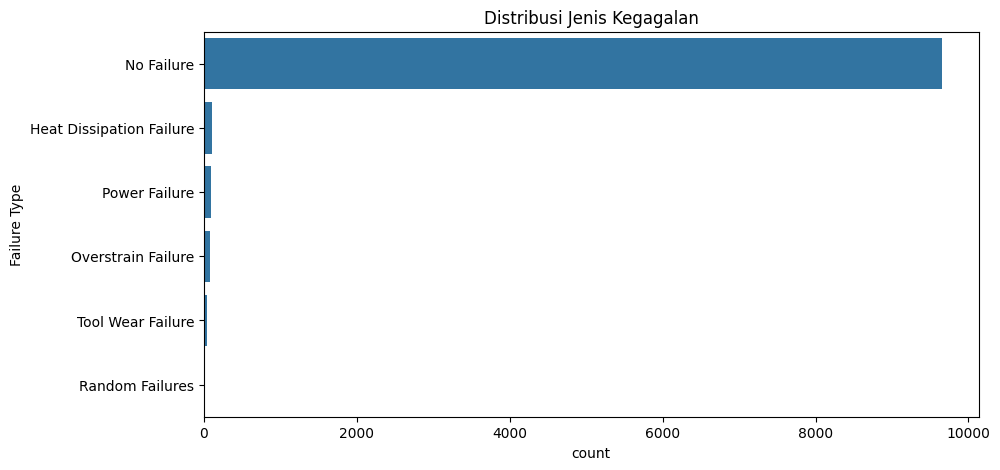

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='Failure Type', data=df, order=df['Failure Type'].value_counts().index)
plt.title('Distribusi Jenis Kegagalan')
plt.show()

Histogram untuk Fitur Numerik


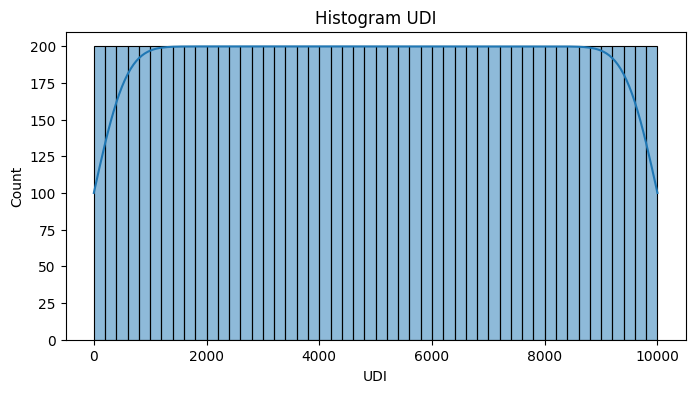

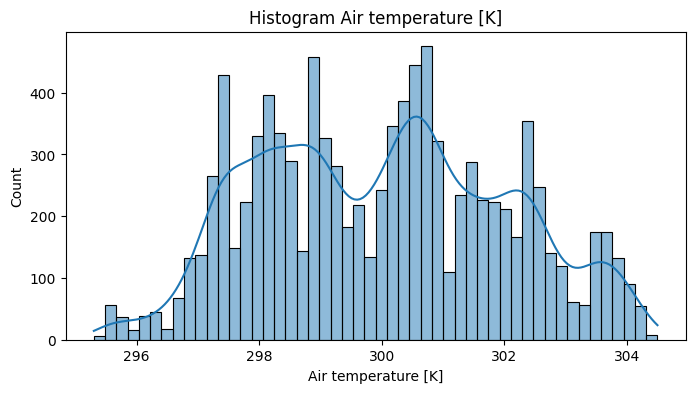

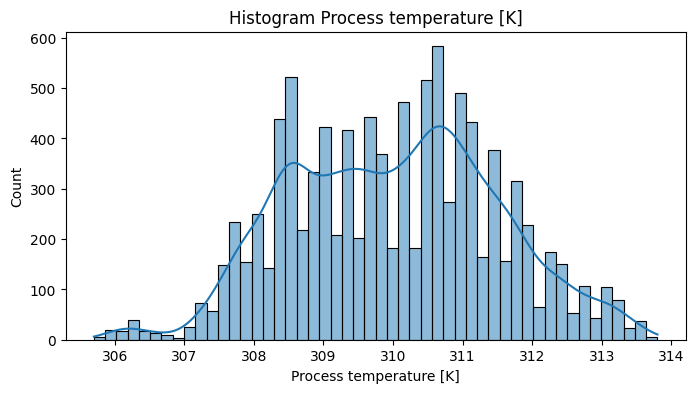

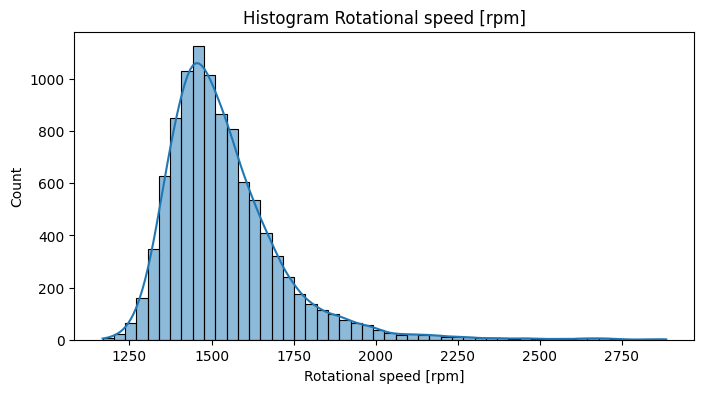

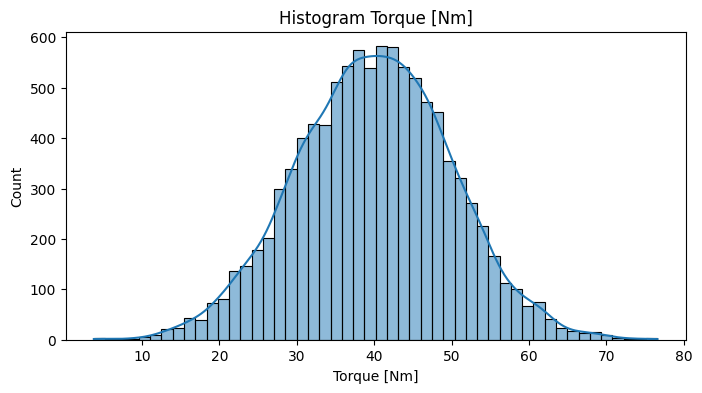

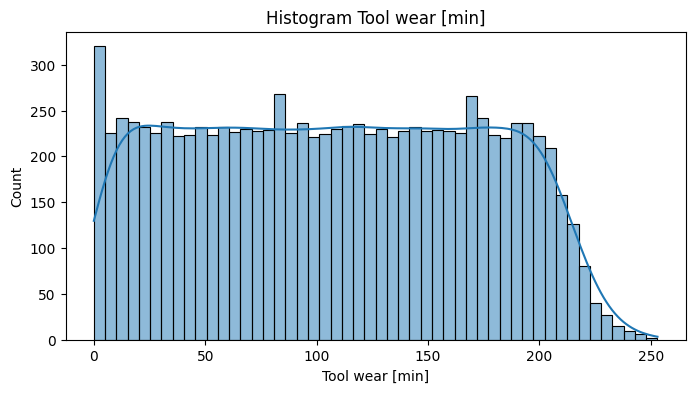

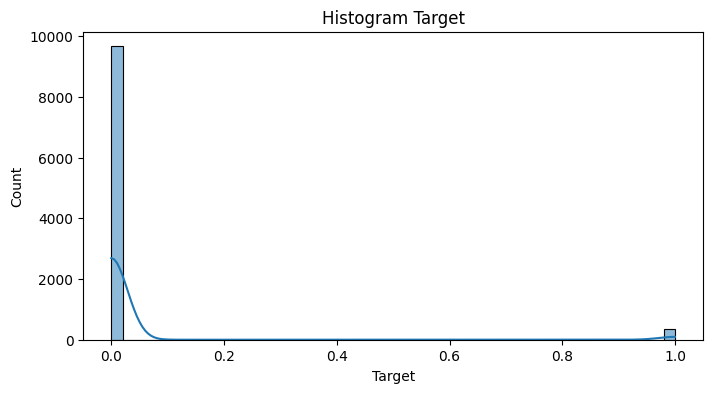

In [ ]:
num_features = df.select_dtypes(include=np.number)

print("Histogram untuk Fitur Numerik")
for col in num_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df[col], kde=True, bins=50)
  plt.title(f"Histogram {col}")
  plt.show()

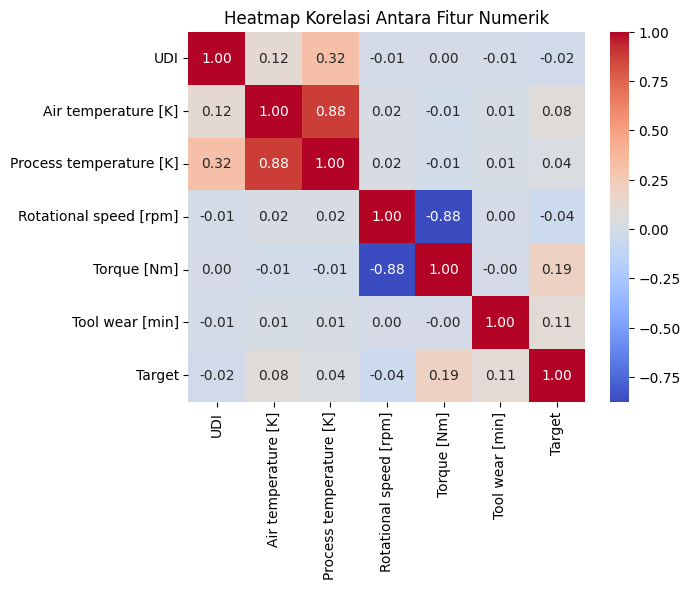

In [ ]:
corr_matrix = df[num_features.columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antara Fitur Numerik')
plt.show()

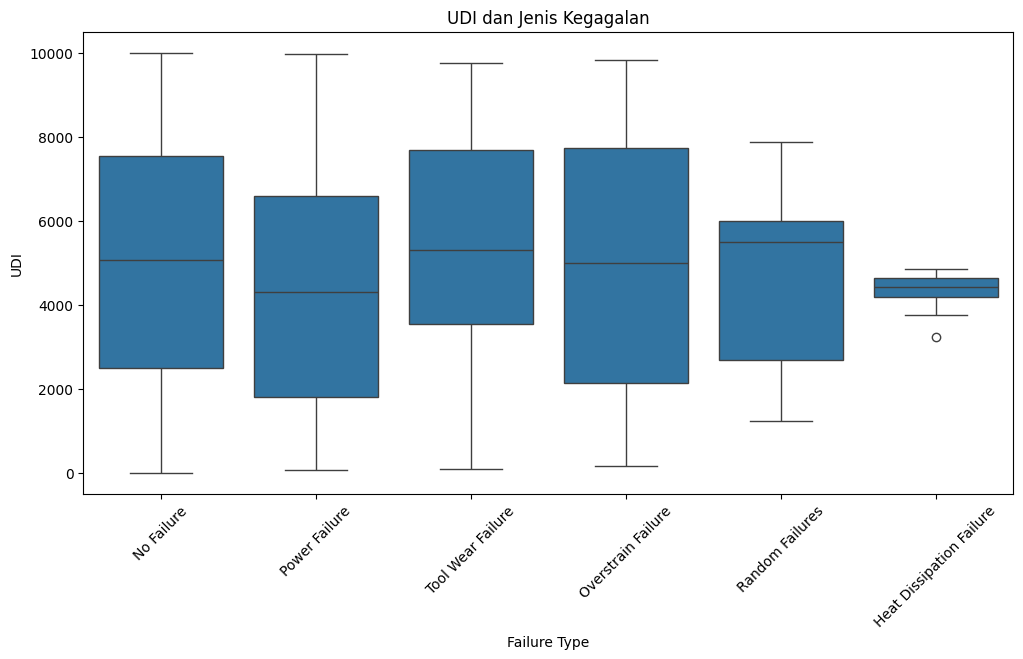

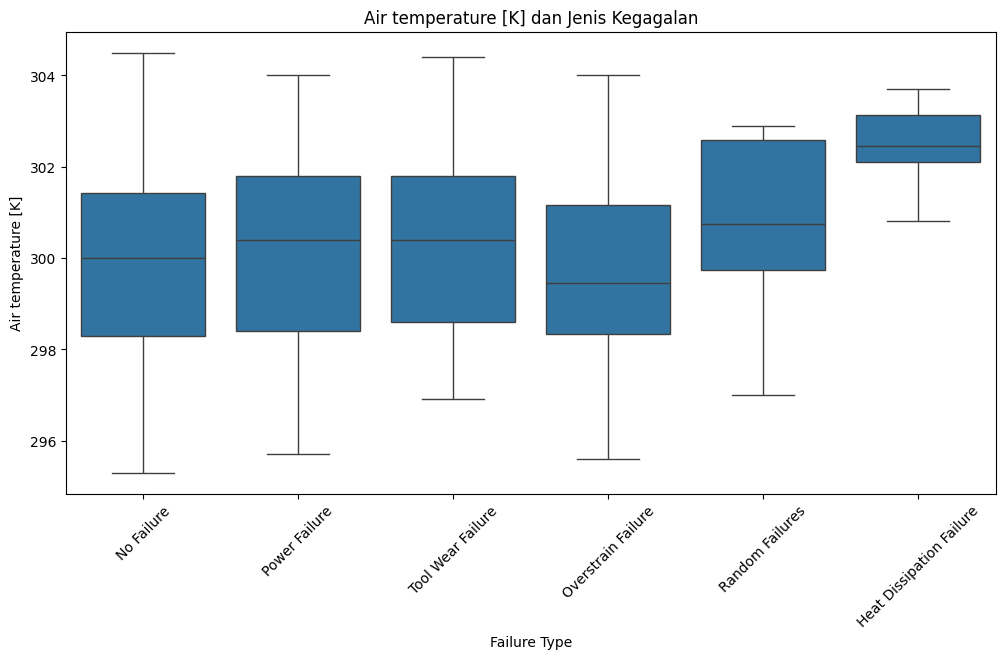

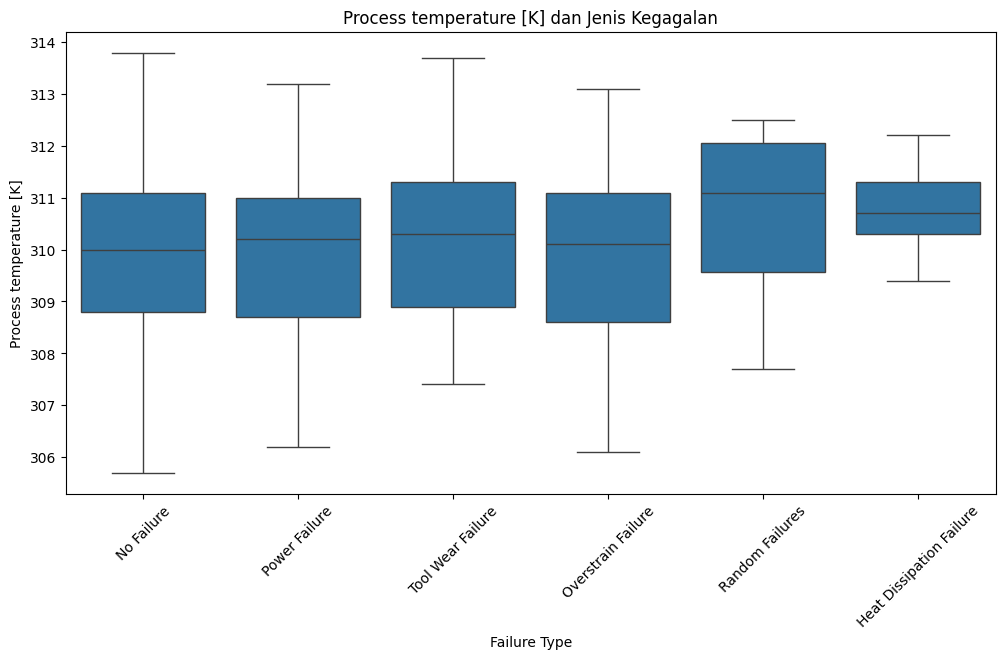

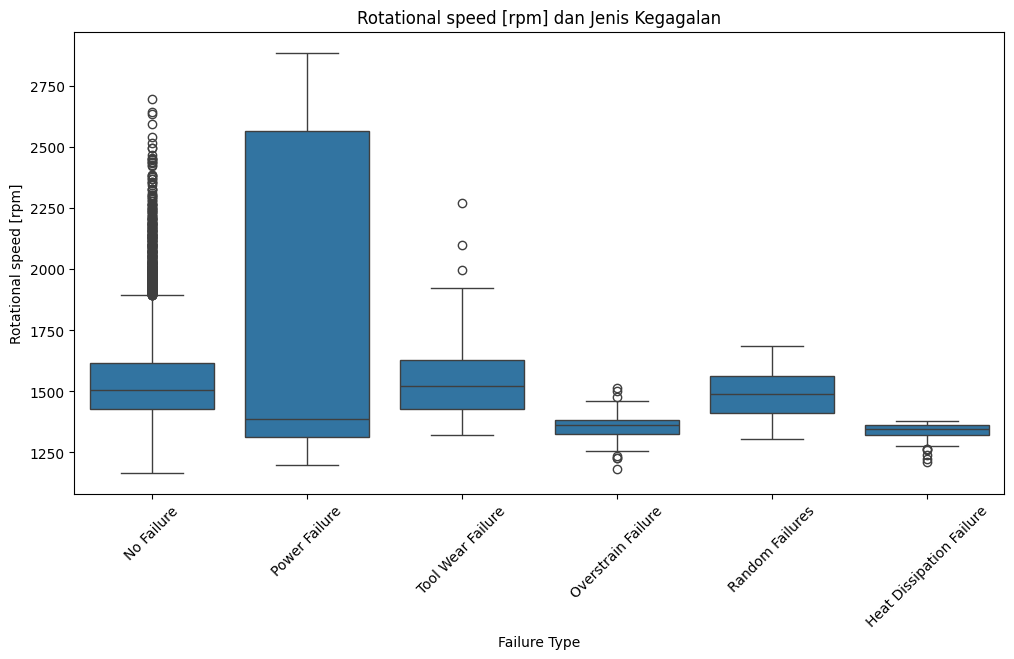

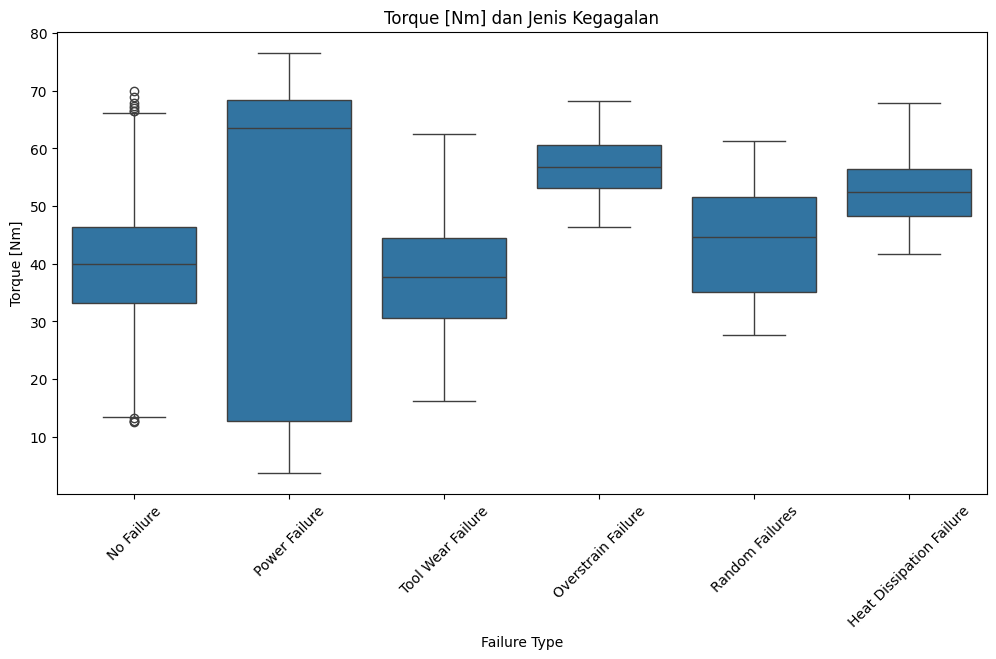

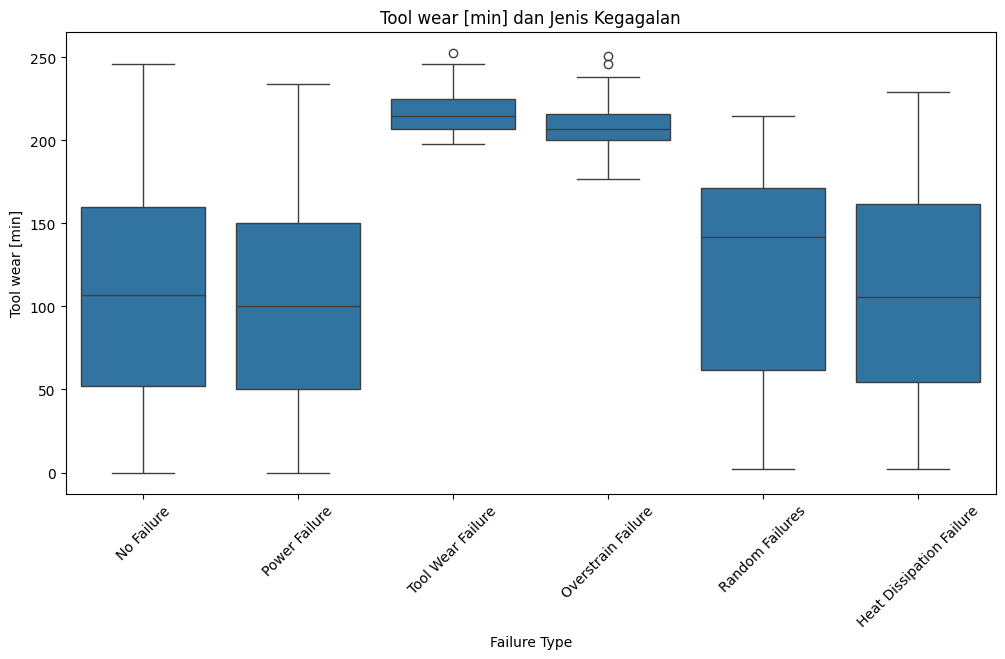

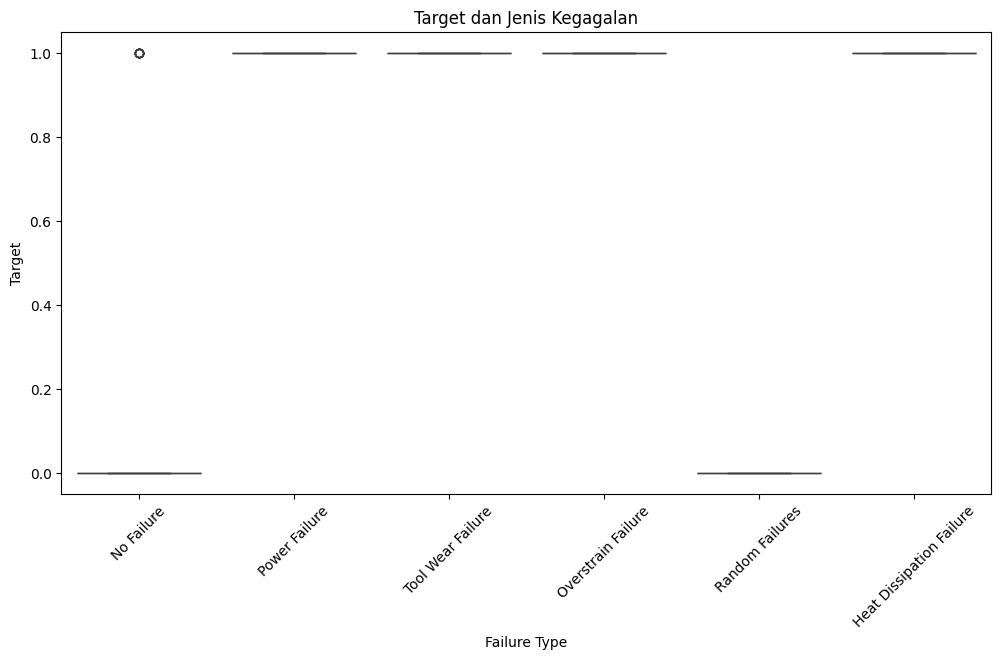

In [ ]:
for col in num_features:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='Failure Type', y=col, data=df)
  plt.title(f"{col} dan Jenis Kegagalan")
  plt.xticks(rotation=45)
  plt.show()

# Preprocessing & Pembuatan Model

Model 1 (Anomaly Detection/Multiclass Classification)  
Model 2 (Time Series)

## Preprocessing Model 1 (Anomaly Detection/Multiclass Classification)

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df_model1 = df.copy()

In [ ]:
df_model1 = df_model1.drop(columns=['UDI', 'Product ID', 'Target'])

df_model1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [ ]:
X_model1 = df_model1.drop(columns=['Failure Type'])
y_model1 = df['Failure Type']

In [ ]:
X_model1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [ ]:
y_model1

,Failure Type
0,No Failure
1,No Failure
2,No Failure
3,No Failure
4,No Failure
...,...
9995,No Failure
9996,No Failure
9997,No Failure
9998,No Failure


In [ ]:
numerical_col = X_model1.select_dtypes(include=['int64', 'float64'])

le = LabelEncoder()

X_model1['Type'] = le.fit_transform(X_model1['Type'])

In [ ]:
X_model1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [ ]:
y_model1 = le.fit_transform(y_model1)

In [ ]:
y_model1

array([1, 1, 1, ..., 1, 1, 1])

## Baseline Model 1

In [ ]:
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(X_model1, y_model1, test_size=0.2, random_state=42,stratify=y_model1)

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_model1, y_train_model1)
y_pred_rf = rf.predict(X_test_model1)

In [ ]:
print("=== Random Forest ===")
print(classification_report(y_test_model1, y_pred_rf, target_names=le.classes_))

=== Random Forest ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.82      0.90        22
              No Failure       0.98      1.00      0.99      1930
      Overstrain Failure       1.00      0.50      0.67        16
           Power Failure       0.89      0.42      0.57        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.98      2000
               macro avg       0.65      0.46      0.52      2000
            weighted avg       0.97      0.98      0.98      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
balanced_accuracy_score(y_test_model1, y_pred_rf)

np.float64(0.4564527191742899)

<Axes: >

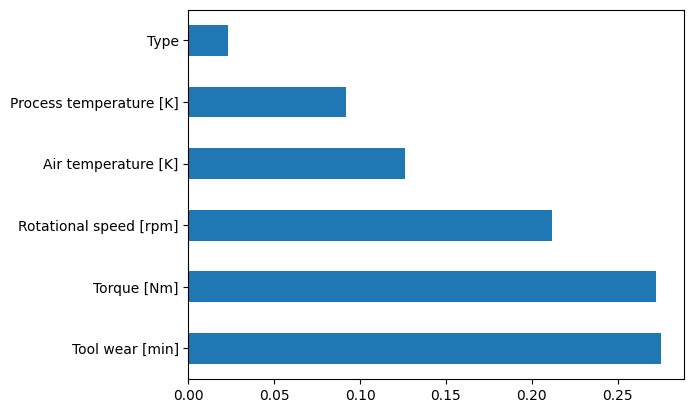

In [ ]:
feat_importance = pd.Series(rf.feature_importances_, index=X_train_model1.columns)
feat_importance.nlargest(10).plot(kind='barh')

## Applying SMOTE to balance the inbalance data

In [ ]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_model1, y_train_model1)

print(f'Original training set shape: {X_train_model1.shape, y_train_model1.shape}')
print(f'Resampled training set shape: {X_train_res.shape, y_train_res.shape}')
print('Class distribution after SMOTE:')
from collections import Counter
print(Counter(y_train_res))

Original training set shape: ((8000, 6), (8000,))
Resampled training set shape: ((46332, 6), (46332,))
Class distribution after SMOTE:
Counter({np.int64(1): 7722, np.int64(5): 7722, np.int64(4): 7722, np.int64(3): 7722, np.int64(0): 7722, np.int64(2): 7722})


In [ ]:
# Retrain Random Forest with resampled data
rf_resampled = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_resampled.fit(X_train_res, y_train_res)
y_pred_rf_resampled = rf_resampled.predict(X_test_model1)

In [ ]:
print("=== Random Forest with SMOTE ===")
print(classification_report(y_test_model1, y_pred_rf_resampled, target_names=le.classes_, labels=np.arange(len(le.classes_))))
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test_model1, y_pred_rf_resampled)}')


=== Random Forest with SMOTE ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.75      0.95      0.84        22
              No Failure       0.99      0.97      0.98      1930
      Overstrain Failure       0.79      0.94      0.86        16
           Power Failure       0.83      0.79      0.81        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.97      2000
               macro avg       0.56      0.61      0.58      2000
            weighted avg       0.98      0.97      0.97      2000

Balanced Accuracy Score: 0.6092687338341142


## XGBoost Model

In [ ]:
import xgboost as xgb

X_train_res.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_res.columns]
X_test_model1.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_model1.columns]

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:04:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_model1)

In [ ]:
print("=== XGBoost Model with SMOTE ===")
print(classification_report(y_test_model1, y_pred_xgb, target_names=le.classes_, labels=np.arange(len(le.classes_))))
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test_model1, y_pred_xgb)}')


=== XGBoost Model with SMOTE ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.92      1.00      0.96        22
              No Failure       0.99      0.97      0.98      1930
      Overstrain Failure       0.75      0.94      0.83        16
           Power Failure       0.73      0.84      0.78        19
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         9

                accuracy                           0.96      2000
               macro avg       0.56      0.63      0.59      2000
            weighted avg       0.98      0.96      0.97      2000

Balanced Accuracy Score: 0.625184642305245


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'lambda': [0.01, 0.1, 1],
    'alpha': [0.01, 0.1, 1]
}

xgb_tuned = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)


random_search = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist,
    n_iter=50,
    scoring='balanced_accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_res, y_train_res)

print("Best parameters found: ", random_search.best_params_)
print("Best balanced accuracy score found: ", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 

In [ ]:

xgb_optimal = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_res)),
    eval_metric='mlogloss',
    use_label_encoder=False, # Suppress warning
    random_state=42,
    **random_search.best_params_ # Unpack best parameters
)

xgb_optimal.fit(X_train_res, y_train_res)

y_pred_xgb_optimal = xgb_optimal.predict(X_test_model1)

print("=== Optimized XGBoost Model with SMOTE ===")
print(classification_report(y_test_model1, y_pred_xgb_optimal, target_names=le.classes_, labels=np.arange(len(le.classes_))))
print(f'Balanced Accuracy Score: {balanced_accuracy_score(y_test_model1, y_pred_xgb_optimal)}')


# **Binary Classification dan Multiclass Classification**

In [ ]:
df

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

# Membuat Model Binary Classification

# Pisahkan Target (y) dan Fitur (X)

In [ ]:
y_binary = df['Target']

X_binary = df.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type', 'Type'])

In [ ]:
X_binary

In [ ]:
print(y_binary.value_counts())

# Pisahkan Data Train dan Test

In [ ]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary,
    y_binary,
    test_size= 0.2,
    random_state= 42,
    stratify = y_binary
)

# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X_train_numerical = X_train_binary[numerical_cols]

scaler_anomaly = StandardScaler()
scaler_anomaly.fit(X_train_numerical)

X_train_processed = scaler_anomaly.transform(X_train_numerical)
X_test_processed = scaler_anomaly.transform(X_test_binary[numerical_cols])

joblib.dump(scaler_anomaly, 'scaler_anomaly.pkl')

In [ ]:
feature_names = numerical_cols

X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train_binary.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test_binary.index)

display(X_train_processed.head())
display(X_test_processed.head())

In [ ]:
X_train_processed

# Menggunakan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print("Distribusi y_train_binary sebelum SMOTE:")
print(y_train_binary.value_counts(normalize=True))

In [ ]:
smote = SMOTE(random_state=42)

X_train_resampled_binary, y_train_resampled_binary = smote.fit_resample(X_train_processed, y_train_binary)

In [ ]:
print("\nDistribusi y_train_resampled_binary setelah SMOTE:")
print(y_train_resampled_binary.value_counts(normalize=True))

# Pelatihan Model

In [ ]:
import xgboost as xgb

X_train_resampled_binary.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_resampled_binary.columns]
X_test_processed.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_processed.columns]

model_binary_smote = xgb.XGBClassifier(
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)

model_binary_smote.fit(X_train_resampled_binary, y_train_resampled_binary)

# Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred_binary = model_binary_smote.predict(X_test_processed)

print("\n--- Classification Report (Model Binary) ---")
print(classification_report(y_test_binary, y_pred_binary))

print("\n--- Confusion Matrix (Model Binary) ---")
cm = confusion_matrix(y_test_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import joblib

joblib.dump(model_binary_smote, 'model_binary_smote.pkl')

# Menggunakan scale_post_weight untuk Meningkatkan Metrik Recall

In [ ]:
ratio = y_train_binary.value_counts()[0] / y_train_binary.value_counts()[1]
print(f"Rasio No Failure / Failure adalah: {ratio:.2f}")

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

model_binary = xgb.XGBClassifier(
    use_label_encoder = False,
    eval_metric = 'logloss',
    random_state = 42
)

X_train_processed_cleaned = X_train_processed.copy()
X_train_processed_cleaned.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_processed_cleaned.columns]

ratio = y_train_binary.value_counts()[0] / y_train_binary.value_counts()[1]
print(f"Rasio No Failure / Failure adalah: {ratio:.2f}")

param_grid_scaled = {
    'scale_pos_weight': [ratio],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200]
}

grid_search_scaled = GridSearchCV(
    estimator=model_binary,
    param_grid=param_grid_scaled,
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_scaled.fit(X_train_processed_cleaned, y_train_binary)
print(grid_search_scaled.best_params_)

In [ ]:
binary_model_scaled = grid_search_scaled.best_estimator_

X_test_processed.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_processed.columns]

y_pred_scaled_binary = binary_model_scaled.predict(X_test_processed)

In [ ]:
print("\n--- Classification Report (Model Binary) ---")
print(classification_report(y_test_binary, y_pred_scaled_binary))

print("\n--- Confusion Matrix (Model Binary) ---")
cm = confusion_matrix(y_test_binary, y_pred_scaled_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import joblib

joblib.dump(binary_model_scaled, 'model_binary_scaled.pkl')

# Membuat Model Multiclass Classification

In [ ]:
df_failures = df[df['Failure Type'] != 'No Failure'].copy()

In [ ]:
display(df_failures.head())

In [ ]:
df_failures.shape

In [ ]:
df_failures['Failure Type'].value_counts()

# Pisahkan Target (y) dan Fitur (X)

In [ ]:
X_multi = df_failures.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type', 'Type'])

y_multi_labels = df_failures['Failure Type']

# Encoding Target (y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize le_multi (specific for multiclass) and fit it here
le_multi = LabelEncoder()
y_multi = le_multi.fit_transform(y_multi_labels)

In [ ]:
import joblib
joblib.dump(le_multi, 'label_encoder_multi.pkl')

In [ ]:
for i, class_name in enumerate(le_multi.classes_):
    print(f"{i} -> {class_name}")

# Pisahkan Data Train dan Test

In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi,
    test_size=0.2,
    random_state=42,
    stratify=y_multi
)

In [ ]:
print(f"\nUkuran X_train_multi: {X_train_multi.shape}")
print(f"Ukuran X_test_multi: {X_test_multi.shape}")

# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

X_train_numerical = X_train_multi[numerical_cols]
X_test_numerical = X_test_multi[numerical_cols]

scaler_anomaly = StandardScaler()
scaler_anomaly.fit(X_train_numerical)

X_train_multi_processed = scaler_anomaly.transform(X_train_numerical)
X_test_multi_processed = scaler_anomaly.transform(X_test_numerical)

In [ ]:
X_train_multi_processed = pd.DataFrame(X_train_multi_processed, columns=numerical_cols, index=X_train_multi.index)
X_test_multi_processed = pd.DataFrame(X_test_multi_processed, columns=numerical_cols, index=X_test_multi.index)

display(X_train_multi_processed.head())
display(X_test_multi_processed.head())

In [ ]:
import joblib

joblib.dump(preprocessor_multi, 'preprocessor_anomaly.pkl', protocol=4)

In [ ]:
scaler_anomaly = StandardScaler()

joblib.dump(scaler_anomaly, 'scaler_anomaly.pkl')

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print("\nDistribusi y_train_multi sebelum SMOTE:")
print(pd.Series(y_train_multi).value_counts())

smote_multi = SMOTE(random_state=42)
X_train_multi_resampled, y_train_multi_resampled = smote_multi.fit_resample(
    X_train_multi_processed, y_train_multi
)

print(pd.Series(y_train_multi_resampled).value_counts())

# Pelatihan Model

In [ ]:
import xgboost as xgb

X_train_multi_resampled.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_train_multi_resampled.columns]

model_multi = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

model_multi.fit(X_train_multi_resampled, y_train_multi_resampled)

# Evaluasi Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_test_multi_processed.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X_test_multi_processed.columns]

y_pred_multi = model_multi.predict(X_test_multi_processed)

print("\n--- Classification Report (Model Multiclass - Diagnostik) ---")
print(classification_report(y_test_multi, y_pred_multi, target_names=le_multi.classes_))

print("\n--- Confusion Matrix (Model Multiclass - Diagnostik) ---")
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
disp_multi = ConfusionMatrixDisplay(confusion_matrix=cm_multi, display_labels=le_multi.classes_)
disp_multi.plot(xticks_rotation='vertical')
plt.show()

In [ ]:
import joblib

joblib.dump(model_multi, 'model_multi.pkl')

# Pipeline Anomaly Detection (Binary + Multiclass)

In [ ]:
import joblib
import pandas as pd
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

try:
    # Load the best binary model (from GridSearchCV with scale_pos_weight)
    model_binary = joblib.load('/content/model_binary_smote.pkl')
    # Ensure consistent preprocessor name
    preprocessor_binary = joblib.load('/content/preprocessor_binary_model.pkl')

    model_multi = joblib.load('/content/model_multi.pkl')
    preprocessor_multi = joblib.load('/content/preprocessor_multi_model.pkl')
    le_multi = joblib.load('/content/label_encoder_multi.pkl')

    print("✅ Semua 5 aset (2 model, 2 preprocessor, 1 encoder) berhasil dimuat.")

except FileNotFoundError:
    print("❌ ERROR: Pastikan semua 5 file .pkl Anda ada di direktori yang sama!")
    raise

In [ ]:
def predict_status(X_new_raw):
    """
    Menjalankan pipeline prediksi 2-tahap lengkap.

    Input:
    - X_new_raw: Sebuah DataFrame (bisa 1 baris atau lebih)
                 yang berisi data MENTAH, *sebelum* di-drop kolom
                 Target/Failure Type.
    """

    # 1. Binary Classification (Anomaly Detection)
    data_binary_processed_array = preprocessor_binary.transform(X_new_raw)

    # Get feature names from the preprocessor and clean them for XGBoost
    binary_feature_names_original = numerical_cols
    binary_feature_names_cleaned = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in binary_feature_names_original]

    # Convert processed array to DataFrame with cleaned column names
    data_binary_processed_df = pd.DataFrame(data_binary_processed_array, columns=binary_feature_names_cleaned)

    pred_binary = model_binary.predict(data_binary_processed_df)

    hasil_prediksi = []

    for i, prediksi_awal in enumerate(pred_binary):
        if prediksi_awal == 0:
            hasil_prediksi.append("No Failure")
        else:
            # 2. Multiclass Classification (Failure Type Diagnosis)
            baris_data_raw = X_new_raw.iloc[i:i+1]
            data_multi_processed_array = preprocessor_multi.transform(baris_data_raw)

            # Get cleaned feature names for multiclass preprocessor (already defined as cleaned_feature_names)
            multi_feature_names_original = numerical_cols
            multi_feature_names_cleaned = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in multi_feature_names_original]

            data_multi_processed_df = pd.DataFrame(data_multi_processed_array, columns=multi_feature_names_cleaned)

            pred_multi_numeric = model_multi.predict(data_multi_processed_df)[0]
            pred_multi_label = le_multi.inverse_transform([pred_multi_numeric])[0]
            hasil_prediksi.append(pred_multi_label)

    return hasil_prediksi[0] if len(hasil_prediksi) == 1 else hasil_prediksi

In [ ]:
file_id = "15mY_Nq8YQEW8tT2q2M9GhU38UznJvzpq"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_csv(url)

X_raw = df.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type', 'Type'])
y_raw = df['Failure Type']


data_normal_raw = X_raw.iloc[10:11]
label_asli_normal = y_raw.iloc[10]

print(f"Menguji data Normal (Label Asli: {label_asli_normal})")
hasil_1 = predict_status(data_normal_raw)
print(f"Hasil Prediksi Pipeline: {hasil_1}")
print("-" * 30)


index_failure = y_raw[y_raw != 'No Failure'].index[0]

data_failure_raw = X_raw.iloc[index_failure : index_failure + 1]
label_asli_failure = y_raw.iloc[index_failure]

print(f"Menguji data Failure (Label Asli: {label_asli_failure})")
hasil_2 = predict_status(data_failure_raw)
print(f"Hasil Prediksi Pipeline: {hasil_2}")
print("-" * 30)

In [ ]:
# Ambil 10 sampel acak dari DataFrame asli
random_sample_df = df.sample(n=10, random_state=42)

# Pisahkan fitur (X) dan target (y) dari sampel acak
X_random_sample = random_sample_df.drop(columns=['UDI', 'Product ID', 'Target', 'Failure Type'])
y_random_sample = random_sample_df['Failure Type']

print("--- Melakukan 10 Uji Prediksi Acak ---")
for i in range(len(X_random_sample)):
    data_to_predict = X_random_sample.iloc[i:i+1]
    actual_failure_type = y_random_sample.iloc[i]

    predicted_status = predict_status(data_to_predict)

    print(f"\nTest {i+1}:")
    print(f"  Data Input: {data_to_predict.to_dict(orient='records')[0]}")
    print(f"  Jenis Kegagalan Asli: {actual_failure_type}")
    print(f"  Hasil Prediksi Pipeline: {predicted_status}")
    print("-------------------------------------")

# Time Series Model

## Preprocessing

In [ ]:
df_model2 = df.copy()

df_model2 = df_model2.sort_values(by='UDI')

display(df_model2.head())

In [ ]:
df_model2['time'] = pd.date_range(start='2025-01-01', periods=len(df_model2), freq='h')

df_model2['hour'] = df_model2['time'].dt.hour
df_model2['dayofweek'] = df_model2['time'].dt.dayofweek
df_model2['dayofyear'] = df_model2['time'].dt.dayofyear
df_model2['month'] = df_model2['time'].dt.month

display(df_model2[['time', 'hour', 'dayofweek', 'dayofyear', 'month']].head())

In [ ]:
y_model2 = df_model2[['hour', 'dayofweek', 'dayofyear', 'month']]

X_model2 = df_model2.drop(columns=['Target', 'Failure Type', 'time', 'UDI', 'Product ID', 'Type', 'hour', 'dayofweek', 'dayofyear', 'month'])

display(X_model2.head())
print("\nFirst 5 values of y_model2:")
display(y_model2.head())

In [ ]:
scaler = MinMaxScaler()
X_model2_scaled = scaler.fit_transform(X_model2)
X_model2_scaled = pd.DataFrame(X_model2_scaled, columns=X_model2.columns)

display(X_model2_scaled.head())

In [ ]:
window_size = 32

X_lstm, y_lstm = [], []

for i in range(len(X_model2_scaled) - window_size):
    X_lstm.append(X_model2_scaled.iloc[i : i + window_size].values)
    y_lstm.append(y_model2.iloc[i + window_size].values)

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

print(f"Shape of X_lstm (samples, timesteps, features): {X_lstm.shape}")
print(f"Shape of y_lstm (samples, target_features): {y_lstm.shape}")
print("\nFirst 2 samples of X_lstm:")
print(X_lstm[:2])
print("\nFirst 2 samples of y_lstm:")
print(y_lstm[:2])

In [ ]:
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

print(f"Shape of X_train_model2: {X_train_model2.shape}")
print(f"Shape of X_test_model2: {X_test_model2.shape}")
print(f"Shape of y_train_model2: {y_train_model2.shape}")
print(f"Shape of y_test_model2: {y_test_model2.shape}")

In [ ]:
model_lstm_regression = Sequential()
model_lstm_regression.add(LSTM(50, activation='relu', input_shape=(X_train_model2.shape[1], X_train_model2.shape[2])))
model_lstm_regression.add(Dropout(0.2))
model_lstm_regression.add(Dense(y_train_model2.shape[1], activation='linear'))

model_lstm_regression.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

model_lstm_regression.summary()

In [ ]:
history_lstm_regression = model_lstm_regression.fit(X_train_model2, y_train_model2, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
print("LSTM regression model trained successfully.")

In [ ]:
y_pred_lstm_regression = model_lstm_regression.predict(X_test_model2)

print('\n=== LSTM Regression Model Evaluation ===')

loss, mae, mse = model_lstm_regression.evaluate(X_test_model2, y_test_model2, verbose=0)
print(f'Overall Test Loss (MSE): {loss:.4f}')
print(f'Overall Test MAE: {mae:.4f}')

output_feature_names = ['hour', 'dayofweek', 'dayofyear', 'month']
for i, feature_name in enumerate(output_feature_names):
    feature_mae = np.mean(np.abs(y_test_model2[:, i] - y_pred_lstm_regression[:, i]))
    print(f'MAE for {feature_name}: {feature_mae:.4f}')

In [ ]:
import matplotlib.pyplot as plt

output_feature_names = ['hour', 'dayofweek', 'dayofyear', 'month']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature_name in enumerate(output_feature_names):
    actual_values = y_test_model2[:, i]
    predicted_values = y_pred_lstm_regression[:, i]

    ax = axes[i]
    ax.scatter(actual_values, predicted_values, alpha=0.6)
    min_val = min(actual_values.min(), predicted_values.min())
    max_val = max(actual_values.max(), predicted_values.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--') # Perfect prediction line
    ax.set_xlabel(f'Actual {feature_name.replace("_", " ").title()}')
    ax.set_ylabel(f'Predicted {feature_name.replace("_", " ").title()}')
    ax.set_title(f'Predicted {feature_name.replace("_", " ").title()} vs. Actual')
    ax.grid(True)

plt.tight_layout()
plt.show()

## Using RUL

In [ ]:
df_model2 = df.copy()

df_model2 = df_model2.sort_values(by='UDI')

display(df_model2.head())

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df_model2['new_cycle'] = df_model2['Tool wear [min]'].diff() < 0
df_model2['Run_ID'] = df_model2['new_cycle'].cumsum()

In [ ]:
df_model2['Run_ID'] = df_model2['Run_ID'].fillna(0).astype(int)

In [ ]:
df_model2['RUL_cycles'] = df_model2.groupby('Run_ID')['UDI'].transform(lambda x: x.max() - x)

In [ ]:
df_model2['max_cycle_life'] = df_model2.groupby('Run_ID')['RUL_cycles'].transform('max')
df_model2['health_score'] = df_model2['RUL_cycles'] / df_model2['max_cycle_life']

In [ ]:
df_model2['health_score'] = df_model2['health_score'].replace([np.inf, -np.inf], 0.0)

In [ ]:
df_model2['Power'] = df_model2['Torque [Nm]'] * df_model2['Rotational speed [rpm]']
df_model2['Temp_diff'] = df_model2['Process temperature [K]'] - df_model2['Air temperature [K]']


In [ ]:
df_model2

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,new_cycle,Run_ID,RUL_cycles,max_cycle_life,health_score,Power,Temp_diff
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,False,0,77,77,1.000000,66382.8,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,False,0,76,77,0.987013,65190.4,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,False,0,75,77,0.974026,74001.2,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,False,0,74,77,0.961039,56603.5,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,False,0,73,77,0.948052,56320.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,False,119,4,10,0.400000,47318.0,9.6
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,False,119,3,10,0.300000,51897.6,9.5
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,False,119,2,10,0.200000,54943.0,9.6
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,False,119,1,10,0.100000,68288.0,9.7


In [ ]:
features = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]
target = 'health_score'

In [ ]:
splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split_idx = splitter.split(df_model2, groups=df_model2['Run_ID'])
train_inds, test_inds = next(split_idx)

In [ ]:
train_df = df_model2.iloc[train_inds]
test_df = df_model2.iloc[test_inds]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features].values)
X_test_scaled = scaler.transform(test_df[features].values)

In [ ]:
def create_windows_by_run(df, scaled_data, window_size=30):
    X_windows = []
    y_windows = []

    unique_runs = df['Run_ID'].unique()

    for run_id in unique_runs:
        mask = df['Run_ID'] == run_id

        data_chunk = scaled_data[mask]
        target_chunk = df[mask][target].values

        if len(data_chunk) < window_size:
            continue

        df_chunk = pd.DataFrame(data_chunk)

        data_smoothed = df_chunk.rolling(window=5, min_periods=1).mean().values

        for i in range(len(data_smoothed) - window_size):
            X_windows.append(data_smoothed[i : i + window_size])
            y_windows.append(target_chunk[i + window_size])

    return np.array(X_windows), np.array(y_windows)

X_train_lstm, y_train_lstm = create_windows_by_run(train_df, X_train_scaled)
X_test_lstm, y_test_lstm = create_windows_by_run(test_df, X_test_scaled)

print(f"Train Shape: {X_train_lstm.shape}")
print(f"Test Shape:  {X_test_lstm.shape}")

Train Shape: (5147, 30, 5)
Test Shape:  (1272, 30, 5)


In [ ]:
model_rul = Sequential()

model_rul.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_rul.add(Dropout(0.2))
model_rul.add(LSTM(units=50, return_sequences=False))
model_rul.add(Dropout(0.2))

model_rul.add(Dense(1, activation='sigmoid'))

model_rul.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_rul.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 100)        │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,651 (283.79 KB)

 Trainable params: 72,651 (283.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'model_health_best.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
model_rul.fit(X_train_lstm, y_train_lstm,
              validation_data=(X_test_lstm, y_test_lstm),
              epochs=50,
              batch_size=64,
              callbacks=[early_stop, checkpoint])

Epoch 1/50
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0146 - mae: 0.0815
Epoch 1: val_loss improved from inf to 0.00153, saving model to model_health_best.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0144 - mae: 0.0807 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 2/50
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0018 - mae: 0.0333
Epoch 2: val_loss improved from 0.00153 to 0.00138, saving model to model_health_best.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0014 - val_mae: 0.0290
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0016 - mae: 0.0315
Epoch 3: val_loss improved from 0.00138 to 0.00133, saving model to model_health_best.keras
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0013 - val_mae: 0.0290
Epoch 4/50
80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0016 - mae: 0.0311
Epoch 4: val_loss improved from 0.00133 to 0.00124, saving model to model_health_best.ker

In [ ]:
results = model_rul.evaluate(X_test_lstm, y_test_lstm, verbose=1)
print(f"Test Loss (MSE): {results[0]:.5f}")
print(f"Test MAE (Error):  {results[1]:.5f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3045e-04 - mae: 0.0213
Test Loss (MSE): 0.00110
Test MAE (Error):  0.02596


Healthiest sample found in test set: 66.29% (Index 578)
--- BASELINE (Sample #578) ---
Tool Wear (Scaled): -0.54
Prediction:         61.31% Health
----------------------------------------
--- TEST 1: SIMULATED EXPLOSION ---
Conditions: Tool Wear says 'New', but Torque/Temp are 'Critical'
Prediction: 51.62% Health
Drop in Health: 9.69%

--- TEST 2: JUST AGING (CLOCK) ---
Conditions: Sensors are 'Normal', but Tool Wear says 'Old'
Prediction: 0.74% Health


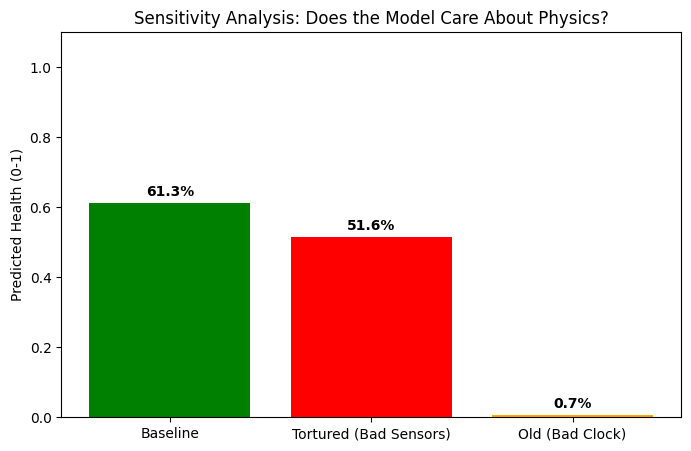

In [ ]:
import copy
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. SETUP: Pick the "Healthiest" Sample Available
# ---------------------------------------------------------
# Instead of hardcoding > 0.9, let's just find the max value in the test set
max_health_idx = np.argmax(y_test_lstm) # Index of the highest health score
max_health_val = y_test_lstm[max_health_idx]

print(f"Healthiest sample found in test set: {max_health_val*100:.2f}% (Index {max_health_idx})")

# Use this sample
sample_idx = max_health_idx

# Get the original input (Scaled)
# Shape: (1, 30, 5) -> [Air, Proc, RPM, Torque, ToolWear]
original_input = X_test_lstm[sample_idx].reshape(1, 30, 5)

# Predict Baseline
baseline_pred = model_rul.predict(original_input, verbose=0)[0][0]

print(f"--- BASELINE (Sample #{sample_idx}) ---")
print(f"Tool Wear (Scaled): {original_input[0, -1, 4]:.2f}")
print(f"Prediction:         {baseline_pred*100:.2f}% Health")
print("-" * 40)

# ---------------------------------------------------------
# 2. THE TORTURE TEST (Physics vs. Clock)
# ---------------------------------------------------------
tortured_input = copy.deepcopy(original_input)

# FEATURE INDICES: 0: Air, 1: Proc, 2: RPM, 3: Torque, 4: Tool Wear

# ACTION: Simulate a catastrophic failure
# We add +5.0 (Standard Deviations), which is a HUGE spike
tortured_input[:, :, 1] += 5.0  # Spike Process Temp
tortured_input[:, :, 3] += 5.0  # Spike Torque

# Predict on Tortured Data
tortured_pred = model_rul.predict(tortured_input, verbose=0)[0][0]

# ---------------------------------------------------------
# 3. THE CONTROL TEST (Just the Clock)
# ---------------------------------------------------------
clock_input = copy.deepcopy(original_input)

# Increase Tool Wear drastically (Make it look old)
clock_input[:, :, 4] += 5.0

clock_pred = model_rul.predict(clock_input, verbose=0)[0][0]

# ---------------------------------------------------------
# 4. RESULTS
# ---------------------------------------------------------
print(f"--- TEST 1: SIMULATED EXPLOSION ---")
print("Conditions: Tool Wear says 'New', but Torque/Temp are 'Critical'")
print(f"Prediction: {tortured_pred*100:.2f}% Health")

change_physics = baseline_pred - tortured_pred
print(f"Drop in Health: {change_physics*100:.2f}%")

print("\n--- TEST 2: JUST AGING (CLOCK) ---")
print("Conditions: Sensors are 'Normal', but Tool Wear says 'Old'")
print(f"Prediction: {clock_pred*100:.2f}% Health")

# ---------------------------------------------------------
# 5. VISUALIZATION
# ---------------------------------------------------------
labels = ['Baseline', 'Tortured (Bad Sensors)', 'Old (Bad Clock)']
values = [baseline_pred, tortured_pred, clock_pred]
colors = ['green', 'red', 'orange']

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.ylabel('Predicted Health (0-1)')
plt.title('Sensitivity Analysis: Does the Model Care About Physics?')
plt.ylim(0, 1.1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v*100:.1f}%", ha='center', fontweight='bold')
plt.show()

--- Inference Test on Sample #0 ---
True Health Score:      0.6104 (61.0%)
Predicted Health Score: 0.5965 (59.7%)
------------------------------
True Remaining Time:      8.55 Days
Predicted Remaining Time: 8.35 Days
Error: 0.19 Days


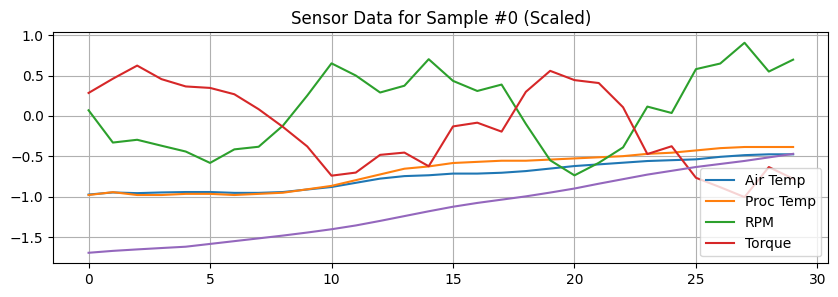

In [ ]:
sample_idx = 0

sample_input = X_test_lstm[sample_idx].reshape(1, 30, 5)

true_health = y_test_lstm[sample_idx]

pred_health = model_rul.predict(sample_input, verbose=0)[0][0]


MAX_LIFE_DAYS = 14.0

print(f"--- Inference Test on Sample #{sample_idx} ---")
print(f"True Health Score:      {true_health:.4f} ({true_health*100:.1f}%)")
print(f"Predicted Health Score: {pred_health:.4f} ({pred_health*100:.1f}%)")

print("-" * 30)

true_days = true_health * MAX_LIFE_DAYS
pred_days = pred_health * MAX_LIFE_DAYS

print(f"True Remaining Time:      {true_days:.2f} Days")
print(f"Predicted Remaining Time: {pred_days:.2f} Days")

error = abs(true_days - pred_days)
print(f"Error: {error:.2f} Days")

plt.figure(figsize=(10, 3))
plt.plot(sample_input[0])
plt.title(f"Sensor Data for Sample #{sample_idx} (Scaled)")
plt.legend(['Air Temp', 'Proc Temp', 'RPM', 'Torque'])
plt.grid(True)
plt.show()

In [ ]:
import random

MAX_LIFE_DAYS = 14.0

print(f"{'Sample':<8} | {'True Health':<12} | {'Pred Health':<12} | {'True Days':<10} | {'Pred Days':<10} | {'Error':<10}")
print("-" * 75)

for _ in range(5):
    # Pick a random spot in the test set
    idx = random.randint(0, len(X_test_lstm) - 1)

    sample_input = X_test_lstm[idx].reshape(1, 30, 5) # Remember 6 features!
    true_health = y_test_lstm[idx]
    pred_health = model_rul.predict(sample_input, verbose=0)[0][0]

    true_days = true_health * MAX_LIFE_DAYS
    pred_days = pred_health * MAX_LIFE_DAYS
    error = abs(true_days - pred_days)

    print(f"{idx:<8} | {true_health*100:5.1f}%       | {pred_health*100:5.1f}%       | {true_days:5.1f} Days | {pred_days:5.1f} Days | {error:5.1f} Days")

Sample   | True Health  | Pred Health  | True Days  | Pred Days  | Error     
---------------------------------------------------------------------------
227      |  35.3%       |  30.7%       |   4.9 Days |   4.3 Days |   0.6 Days
764      |  55.2%       |  55.8%       |   7.7 Days |   7.8 Days |   0.1 Days
579      |  65.2%       |  60.4%       |   9.1 Days |   8.5 Days |   0.7 Days
470      |  60.5%       |  60.7%       |   8.5 Days |   8.5 Days |   0.0 Days
419      |  55.8%       |  52.5%       |   7.8 Days |   7.3 Days |   0.5 Days


In [ ]:
import joblib

joblib.dump(scaler, 'scaler_lstm.pkl')

['scaler_lstm.pkl']